# 1. Objective

- Understanding Classification
- Solving MNIST Classification Problem
- Date : 16th Sep 2024

# 2. Data Loading

In [1]:
# loading MNIST Data
# set of 70k small images of digits underwritten (0-9)
# its available in sklearn datasets 


from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False, parser='auto')


# 3. Data Glance

In [2]:
# mnist

In [3]:
X,y = mnist.data, mnist.target

X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

In [7]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary')
    plt.axis('off')

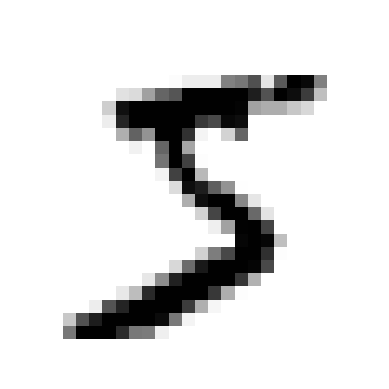

In [8]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [9]:
y[0]

# above picture looks like 5, also its target is 5

'5'

# 4. Spliting Train and Test Data

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 5 Training a Binary Classification

- objective 
  - though there are 10 class for classification
  - we will start with basic, classifying only 2 classes either its five or non five
  - binary classifier
  
**Stochastic Gradient**
  - Classifier is capable of handling very large datasets,
  - SGD Can escape local minima more easily due to its stochastic nature.
  - suited for online learning,


In [11]:
y_train_5 = (y_train == '5') # true for all 5s, False for all other digits
y_test_5 = (y_test == '5')


print(y_train_5.sum()/len(y_train_5)*100)

9.035


In [12]:
from sklearn.linear_model import SGDClassifier

# initialize the classifier ------
sgd_clf = SGDClassifier(random_state = 42)

# fit the model -------------

sgd_clf.fit(X_train, y_train_5)



SGDClassifier(random_state=42)

In [13]:
# Predict the data

sgd_clf.predict([some_digit])

array([ True])

# 6. Performance Measures

## 6.1 Measuring Accuracy using Cross Validation

In [ ]:
#Measuring Accuracy using Cross validation


from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(estimator = sgd_clf, X = X_train, y=y_train_5, cv = 3, scoring = 'accuracy') 
print(cv_score)

In [ ]:
# above we have recieved more than 95% accuracy in all 3 sets. is it correct
# lets validate with dummy classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()

dummy_clf.fit(X_train, y_train_5)

print(any(dummy_clf.predict(X_train))) # here print "false" means no 5's detected

In [ ]:
#lets check cross validation score tooo

cross_val_score(estimator = dummy_clf, X = X_train, y = y_train_5, cv = 3, scoring = 'accuracy')

#Here also all 3 sets, accuracy score is greater than 90%

# this states that "accuracy " is generally not preferred performance measure for classifiers, especially when you are dealing skewed datasets (when some classes are more frequent than others)

- Here also all 3 sets, accuracy score is greater than 90%

- this states that **"accuracy" is generally not preferred performance measure for classifiers**, especially when you are dealing **skewed datasets** (when some classes are more frequent than others)
- **Confusiion Matrix** CM, is considered a much better metric to evaluate the performance of a classifier 


# implementing Cross validation own


from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3) # add shuffle = true if dataset is not already suffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_fold = X_train[train_index]
    y_train_fold = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(n_correct/len(y_pred))

## 6.2 Confusion Matrix

- **cross_val_predict is a powerful tool for obtaining cross-validated predictions that can enhance your model evaluation process**. 
- It’s particularly useful when you want to get a clearer picture of how your model performs across the entire dataset while using cross-validation techniques. 

In [ ]:
## cross val preditct

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(estimator = sgd_clf, X = X_train, y= y_train_5, cv =3)

In [ ]:
# now lets create confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred) #(actual , and predicated)


cm 


**each row represents actual class**, 
**while each column represnts predicated class**
   - first row considers non_five images ,
        - out of which 53892 are predicated non_five images (true Negatives), 
        - while 687 were wrongly classified as five images (**type 1 error, false positives**)
   - second row considers five's images
        - 1891 were wrongly mapped non_five images (**type 2 error, false Negative**)
        - 3530 wre correctly mapped as five's images (true Positives)
        
- A perfect classifier should have only true positives and true negatives 

**Precision and Recall**

- Precision  = TP/(TP+FP)
- Recall = TP/(TP+FN) , also known as **sensitivity  or true positive rate**

In [ ]:
# via sklearn

from sklearn.metrics import precision_score, recall_score
print('precision', precision_score(y_train_5, y_train_pred))
print('recall', recall_score(y_train_5, y_train_pred))

from above Numbers
  - when it claims an image represnts a 5's, it is correct only 83%
  - moreover its detect only 65% of 5's
  
  
---
### -----------------------
---

- its always convient to combine precision and recall into a single metric, called **F1 score**, 
- **single metric is helpful to compare two classifiers**
- F1_score is harmonic mean of precision and recall

**Why Harmonic mean not arithmetic mean**

- Both scores are important

- **The harmonic mean used in the F1 score provides a more conservative estimate that emphasizes the lower of the two metrics (precision and recall), making it a better choice for scenarios where both metrics are important**.

- Example
    - Precision =0.9
    - recall = 0.1
    
    then 
    - arithmetic mean = (a+b)/2 = (0.9 + 0.1) = 0.5
    - harmonic mean = 2ab/(a+b) = (2 * 0.9 * 0.1)/(0.9 + 0.1) = 0.18
    
- **The F1 score provides a more balanced measure of a model's performance, especially in situations where there is an imbalance between the classes**. 
  - This is particularly relevant in scenarios where false negatives (missed positive instances) are more critical than false positives (incorrect positive predictions) or vice versa.
    
    

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

## 6.3 Precision and Recall Tradeoff

**F1 scores favors classifiers that have similar precision and recall**
  - But this is not always we want
  - sometimes Precision is more important 
  - sometimes Recall is more important
  
**When Precision is more Important**

  - **Defination** : Precision is the ratio of true positive predictions to the total predicted positives (true positives + false positives). High precision indicates a low false positive rate.

  - **Priortization** When False Positives are Costly: In situations where falsely identifying a positive instance leads to significant negative consequences, you should prioritize precision.

  - **Example** 
  
      - **Email Spam Detection** when its legitamte email, it will lead to missing critical information
      - **Using facial recognition to grant access to secure areas**



**When Recall is more Important**

  - **Priortization** When False Negatives are Costly: In scenarios where failing to identify a positive instance has severe consequences, recall should be prioritized.
 
 - Example 
      - **Video classifying safe for kids**
      - **Screening tests for a serious disease like cancer**
      - **Locating missing persons or disaster victims**
        
**Precision and recall are intertwined**; increasing precision reduces recall and vice versa. This is known as the **precision-recall trade-off**. 

- scikit learn   classifier had a function which gives **'decision_function()'** method which returns a score for each instance and then we can set a threhsold  to make predication,  


- Enabling you to navigate the precision-recall trade-off effectively. This flexibility is particularly valuable in scenarios where the costs of false positives and false negatives differ significantly.



In [ ]:
# print(some_digit)
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

# the deafult threshold for sgd_classifier is zero

threshold = 0

y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

In [ ]:
#lets raise the threshold

threshold = 3000

y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 3,000.

In [ ]:
# how to decide which threshold to use
## lets cv_predict but this time with decision_scores method

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision", linewidth = 2)
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall", linewidth = 2)
plt.vlines(thresholds, 0,1, "k", 'dotted', label = "threshold")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plotting precision and recall against thresholds
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

# Vertical lines at threshold values
plt.vlines(thresholds, 0, 1, colors='k', linestyles='dotted', label="Threshold")

# Adding labels and legend
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.legend(loc="best")

# Display the plot
plt.show()

In [ ]:
print(5/6, 4/6)

In [ ]:
plt.plot(recalls, precisions, linewidth = 2 , label = 'Precision/Recall Curve')

In [ ]:
thresholds

In [ ]:
idx_for_90_precision = (precisions >= 0.90).argmax()
print([idx_for_90_precision])

threshold_for_90_precision = thresholds[idx_for_90_precision]

print(threshold_for_90_precision)

In [ ]:
# lets make predications based on threshold_90, (insted of calling classifier predict predict() method)


import numpy as np
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

unique,counts = np.unique(y_train_pred_90, return_counts = True)

print(dict(zip(unique, counts)))

In [ ]:
# lets check precision and recall for these predications


print(precision_score(y_train_5, y_train_pred_90))

recall_at_90_precison = recall_score(y_train_5, y_train_pred_90)

print(recall_at_90_precison)

**using these techinque we can calcualte any precision we want**
  - just set enough threshold`
  - though above recall value is not great, 

## 6.4 ROC Curve

- ROC: Receiver Operating Characterstics curve
- another common tool used with **binary classifications**
- similar to Precision and recall curve but instead of plotting Precision-Recall curve, 

- **It plots the true positive rate (TPR/Recall) against the false positive rate (FPR/ Fall out) at various classification thresholds**.
- FPR is the ratio Negative instances that are incorrectly classified as positive.
- FPR is equal to (1- true Negative Rate) 
- TNR is also specificity
- ROC curve plot Sensitivty(Recall) vs "1 - Specificity"
- TPR VS FPR

| | Predicted Negative | Predicted Positive |
|---|---|---|
| Actual Negative | TN | FP |
| Actual Positive | FN | TP |

**Interpretation:**

* **AUC:** A higher AUC indicates better overall performance.
* **ROC Curve:** A curve closer to the top-left corner indicates better sensitivity and specificity.
* **Threshold:** The optimal threshold can be determined by considering the desired balance between sensitivity and specificity based on the specific application.


- **Sensitivity**: True Positive Rate (TPR) = TP / (TP + FN)
- **Fall out**: False Positive Rate (FPR) = FP/(FP+TN)

### -- -- -- -- --
- **Specificity**: True Negative Rate (TNR) = TN / (TN + FP)
- **Precision**: TP / (TP + FP)
- **Recall**: **TPR**

In [ ]:
# to plot roc curve , we have to use roc_curve() function to get TPR and FPR

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


In [ ]:
print([fpr, tpr, thresholds])

In [ ]:
# to find the point that corresponds to 90% precision, we need to look for the index of the desired threshold

idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()

tpr_90, fpr_90 = tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]


In [ ]:
plt.plot(fpr, tpr, linewidth = 2, label = 'ROC curve')

plt.plot([0,1],[   0,1],linestyle = ':', color = 'red', label = "Random classifier's ROC curve")

plt.plot([fpr_90], [tpr_90], 'ko', label = "Threshold for 90% precision")


# Adding a title and labels
plt.title('ROC Curve Example')
plt.xlabel('False Positive Rate (Recall)')
plt.ylabel('True Positive Rate')

# Display the legend
plt.legend(loc='best')

plt.show()

- the dotted line represents the ROC curve of a purely random classifier
- a good classifier stays as far  away from that line as possible

- **one way to classify the ROC curve is to measure the area under the curve(AUC)**
- a perfect classifier will have roc_aoc equal to 1
- a purely random classifier will have a roc_aoc equal to 0.5
- scikit learn provides function to estimate the roc_auc value


In [ ]:
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_train_5, y_scores)

### Since ROC curve is similar to precision recall curve, when to use which one?

- We should prefer the PR curve whenver the positive class is rare or we care more about the false positives than false negatives
- Otherwise ROC curve
- here, MNIST digit representation, that too 5's or not 5's, 5's are rare (only 10% of data, PR curve makes sense here

In [ ]:
# lets create a random classifier and compare with sgdclassifier results

from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier(random_state = 42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')

In [ ]:
y_probas_forest[:10]

In [ ]:


for i in range(10):
    plot_digit(X[i])
    plt.show()

In [ ]:
# the second column represnts the estimated probabilites for the positive class 

y_scores_forest = y_probas_forest[:,1]
print(y_scores_forest)

In [ ]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

In [ ]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth = 2,label = "RandomForest")


plt.plot(recalls, precisions, "r--", linewidth = 2, label = "SGD")

plt.xlabel('Recall')
plt.ylabel ('ylabel')
plt.legend(loc = 'best')

plt.show()


In [ ]:
y_train_pred_forest = y_probas_forest[:,1]>= 0.5 # positive proba

print(f1_score(y_train_5, y_train_pred_forest))
print(roc_auc_score(y_train_5, y_scores_forest))

In [ ]:
print("sgd f1 score", f1_score(y_train_5, y_train_pred))
print('sgd roc_auc_score', roc_auc_score(y_train_5, y_scores))

- RandomForestClassifier’s PR curve looks much better than the SGDClassifier’s: 
- it comes much closer to the top-right corner. 
- Its F1 score and ROC AUC score are also significantly better:

# 7. Multimodel Classification

- Binary classifiers: Classify two classes
- Multiclass classifiers : Classify multiple classes

- **Some scikit learn classifier is capable of handling multiple classes**
   - Logistic Regression
   - Random Forest
   - GaussianNB
- Others are **strictly binary classifiers**
   - SGD Classifier
   - SVC
- However they are various ways, we can use to perform multiclass classification with multiple binary classifiers

#### Multiple classification using multiple binary classification


  - **OVR: One versus Rest also know as OVA (one Versus All)** strategy
      - for mnist data, to classify the digit images into 10 classes (0 to 9) is to train **10 bianry classifiers**
           - selecting the class whose classifier outputs the highest score.
           
  - **OVO: One versus One** Strategy
       - here we have to train a binary classifer for every pair of digits,
           - 0 vs 1, 0 vs 2, .... 1 vs 2 , 1 vs 3 , ... 8 vs 9
           - if there is N classes, we need to train `N*(N-1))/2` classifiers. for Mnist  we have to train 45 classifiers
           - The OvO strategy’s main advantage is that each classifier is trained only on the data related to the two classes it is trying to distinguish, which allows for more efficient learning, faster training times, and potentially improved classification accuracy. 

| Criteria                       | Use OvR                                   | Use OvO                                   |
|--------------------------------|-------------------------------------------|-------------------------------------------|
| Number of Classes              | Large classes (many)                      | Small classes (few)                       |
| Class Imbalance                 | Better for imbalanced datasets            | Can handle imbalance but less directly    |
| Computational Efficiency        | More efficient (fewer classifiers)       | Less efficient (more classifiers)         |
| Model Complexity                | Simple models (e.g., logistic regression) | Complex models (e.g., SVMs)               |
| Interpretability                | Easier to interpret                       | Can be more complex to interpret          |
| Specific Nuances in Classes     | Less detail per classifier                | More detail per pair of classes           |
| Overall Accuracy                | Good for simpler decision boundaries      | Potentially higher accuracy with complex boundaries |



- some algorithms (SVM classifiers)  scale pooorly with size of training set
- For these type of algo's OvO is preferred, becasues its faster to train many classifiers  on small training data sets than to train few classifiers on large training sets
- for most classifications algorithms **OvR** is preferred


# ------

- SKlearn, detects automatically when to use binary classification for a multiclass classification task. **and it automatically runs Ovr or Ovr** depending on algorithm

- lets try with only 2k observation with SVC algo

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000], y_train[:2000])

#  Scikit-Learn used the OvO strategy

In [ ]:
svm_clf.predict([some_digit])

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

In [ ]:
svm_clf.classes_

In [ ]:
class_id = some_digit_scores.argmax()
class_id

In [ ]:
# if you want to force scikit learn to use one versus one or one versus rest
   #OneVsOneClassifier
   #OneVsRestClassifier

from sklearn.multiclass import OneVsRestClassifier

ovr_svm_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_svm_clf.fit(X_train[:2000], y_train[:2000])

ovr_svm_clf.predict([some_digit])

In [ ]:
len(ovr_svm_clf.estimators_)

#### Training SGD Classifier on multiclass dataset 

In [ ]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)

sgd_clf.predict([some_digit])

In [ ]:
# above is predication error , this time scikit learn used OvR strategy under the hood
# since there are 10 classes, it train 10 binary classification
# lets chech values using decision function method

In [ ]:
sgd_clf.decision_function([some_digit]).round(2)

In [ ]:
# from above output, we can see that 3 is the best with 1823 score, while all are negative, second best is 5( which is true)
# lets check cross val score too

cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

# in all the sets, we we get around 86% accuracy, not a bad score

# we can insrease the accuracy using scaling the inputs` 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

# 8 Error Analysis

#### in real project, we need to do extra more work , like 
  - data exploration
  - try out multiple models
  - shortlist best model
  - fine tune their hyperparameters using GridSearchCV
  - automate as much as possible


**But for now, assume we found the best model and we want to find ways to imporve it futher** 
   - one ways to analyze the types of errors it makes
   - First, look at the confusion matrix
  

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv =3)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [ ]:
# we can notice in above fig, row 5 and col 5, is more darker than other main diagonal elemnts
# this may be happening because of wrong predications of 5 or 
# lesser number of 5's data, which we have to normalize by each classification image with total number of images
# this normalize can be done easily on "ConfusionMatrixDisplay" by setting normalize = 'true'

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize = "true", values_format = ".0%")
plt.show()

In [ ]:
# most of the erros had happened misclassifying 8, alot of differnt numbers mapped as 8

# if you want to visulaize the error more, 
  # - we have to put zero weights the correct classifications 

    
sample_weight = (y_train_pred != y_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, 
                                        sample_weight = sample_weight,
                                       normalize = 'true', values_format = '.0%')
plt.show()

- analyzing individuals errors can be also be good way to gain insights

- Data augmentation: Approach consists of augmenting the training data set with slightly shifted and rotated variants of the training images. This will force the model to learn  to be more tolerant to such variations.


- Data augmentation is a technique commonly used in machine learning, especially in computer vision, to increase the size and diversity of a training dataset by creating modified versions of existing data. This is particularly useful when you have limited data and want to improve the performance and generalization of your model. The key idea is to apply transformations to the data in a way that preserves the underlying information while introducing variability

# 9. Multilabel Classification

- until now, each instance has always been assigned to just one class
- But in some cases you may want your classifier to output multiple classes for each instance
- example 
     - Face-Recognition classifier 
          - classifier has been trained to classify a picture among three faces Gadkari, Rahul, Kejriwal
          - suppose a picture is shown where Gadkari and Kejriwal present, then it will give output [True, False, True]
     - Movie type tagging : Comedy, Horror, Drama , Scifi, Adventure
            - Stree : comedy, horror
     
     - this type of classification system gives outputs multiple binary tags


    

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8')%2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

# yes its right, the digit is indeed not large [False], and odd [true]

## 9.2 Evalute a Multilabel classification

- there are many ways to evalute a multilabel classifier and selecting right metric
- it really depends on the project


- one Approcach is to measure the F1 socre for each individual lable, then simply compute the average score

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average = 'macro')

# this approach assumes that all labels are equally important, which may not be the case.

- if we have many more pictues of Gadkari than Rahul and kejriwal, 
- we need to give more weight to the classifier's score on picture of Gadkari
- one simple option is to give each label a weight equal to its support (i.e. the the number of instances with that target lable)
- it can be done by setting average = 'weighted' when calling F1_score function

- some of the classifier doesn't support Multilable Classification, eg SVC
- one possible strategy is to train one model per label

- these types models can be trained in a chain method. 
   - when a model makes a predications, it uses the input features plus all the predications of the models that come before it in the chain
    

-scikit learn has a class called ChainClassifier

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv = 3, random_state = 42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])


chain_clf.predict([some_digit])

# 10. Multiouput Classification

- Multioutput Multiclass classification : generalization of multilabel classification where each label can be multiclass 

In [ ]:
np.random.seed(42) 

noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test


In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

clean_digit = knn_clf.predict([X_test_mod[0]])

plot_digit(clean_digit)
plt.show()

## Happy Learning
#### Science is the Systematic Classification of Experiences 